<a href="https://colab.research.google.com/github/Noks06/Prediction-of-Stroke-and-Car-insurance-/blob/main/Project_2_Part_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 Part 2
by Nokuthula Mchunu

In [1]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing relevent imports
import pandas as pd
import numpy as np

# for Visualisation
import matplotlib.pyplot as plt
import seaborn as sbn
# for Preprocessing and models
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
# decomposition
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay



##  First choice: Stroke Prediction Dataset

In [3]:
#read csv file and load to dataframe
strokefile ='/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv'

dfstroke = pd.read_csv(strokefile)
#explore top 5 rows
dfstroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dfstroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


1. Source of data
  * The source of data is from Kaggle.com

2. Brief description of data
  * Dataset contain information of client or patiant to be predicted whether they have a stroke or not

3. What is the target?
  * Stroke
4. What does one row represent? (A person? A business? An event? A product?)
  * Row represent a person

5. Is this a classification or regression problem?
  * classification problem

6. How many features does the data have?
  * 12 columns
7. How many rows are in the dataset?
  * 5110 rows
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  * I dont foresee much challenges in cleaning the data, only have mbi column that have missing values that needs to be imputed, datatypes are in good shape, might have duplicates column and inconcestancy.Exploring the data there will be no challanges and with modelling may be the challenge will be to choose the best model out of many that I will be trying  

## Second choice: Car Insurance Dataset

In [5]:
# read csv file and load the dataframe
car_Insure_file ='/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/Car_Insurance_Claim.csv'
dfcar_insure = pd.read_csv(car_Insure_file)

# explore top 5 record
dfcar_insure.head(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [6]:
dfcar_insure['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [7]:
# get a quick stats on info
dfcar_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

1. Source of data
  * kaggle.com
2. Brief description of data
  * This data is for car insurance, predicting whether a client put a clain or not
3. What is the target?
  * Outcome
4. What does one row represent? (A person? A business? An event? A product?)
  * person
5. Is this a classification or regression problem?
  * classification problem
6. How many features does the data have?
  * Has 19 features
7. How many rows are in the dataset?
  * 10000 rows
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

* I dont foresee much challenges in cleaning the data, only have credit_score and annual ANNUAL_MILEAGE column that have missing values that needs to be imputed, datatypes are in good shape, might have duplicates column and inconcestancy.Exploring the data there will be no challanges and with modelling may be the challenge will be to choose the best model out of many that I will be trying  

###Part 2

#### EDA-Load And Explore Data Analysis

In [8]:
# Info for Car Insurance data sets
dfcar_insure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Total number of 10000 rows and 19 columns.
Credit_Score and Annual_Mileage  has a missing values. There are 6 floats, 5 int and 8 objects

#### Droping Unnecessary columns

Droping the unnecssary columns and those are:
* ID
* CREDIT_SCORE
There is not much I can use thes two feature, they are irrelevent in this case

In [9]:
# dropping unnecssary code
dfcar_insure = dfcar_insure.drop(columns=['ID','CREDIT_SCORE'])
dfcar_insure.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


#### Checking the Duplicates And Droping If Any

In [10]:
# checking duplicates
dfcar_insure.duplicated().sum()

771

In [11]:
# droping the duplicated
dfcar_insure = dfcar_insure.drop_duplicates()

In [12]:
#rechecking for duplicates
dfcar_insure.duplicated().sum()

0

#### Checking Inconcistancy

In [13]:
#Selecting object columns
str_col = dfcar_insure.select_dtypes(include='object').columns
str_col


Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [14]:
# printing the value count for each r=to check for inconsistancy
for stri in  str_col:
  print(dfcar_insure[stri].value_counts())
  print('')

26-39    2960
40-64    2848
65+      1919
16-25    1502
Name: AGE, dtype: int64

male      4645
female    4584
Name: GENDER, dtype: int64

majority    8258
minority     971
Name: RACE, dtype: int64

10-19y    3239
0-9y      2856
20-29y    2089
30y+      1045
Name: DRIVING_EXPERIENCE, dtype: int64

high school    3796
university     3739
none           1694
Name: EDUCATION, dtype: int64

upper class      4156
middle class     2070
working class    1602
poverty          1401
Name: INCOME, dtype: int64

before 2015    6308
after 2015     2921
Name: VEHICLE_YEAR, dtype: int64

sedan         8755
sports car     474
Name: VEHICLE_TYPE, dtype: int64



The consistancy seems to be good data in data set is consistance.

#### Checking Missing Values

In [15]:
# checking for missing data
# first need to make a copy of dataframe for machine learning
df_ML = dfcar_insure.copy()
df_ML.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [16]:
# Check for Null values
#Credit_Score and Annual_Mileage

dfcar_insure.describe(include='number')

,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9229.000000,9229.000000,9229.000000,9229.000000,8357.000000,9229.000000,9229.000000,9229.000000,9229.000000
mean,0.711020,0.518149,0.706144,20362.579369,11600.813689,1.595948,0.257883,1.134576,0.284971
std,0.453313,0.499698,0.455552,19365.351795,2820.765050,2.292406,0.572472,1.690730,0.451425
min,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,10238.000000,12000.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.000000,15.000000,1.000000


* Dataset has got some outliers Speeding_Violations, Duis and Pass_Accidents because their max value, min_value and mean shows abig gap between them.
* Credict Score has missing Values as well as Annual_Mileage has missing values.

In [17]:

# median of annual mileage
am_median = dfcar_insure['ANNUAL_MILEAGE'].median()
am_median

12000.0

In [18]:
# replacing null values using placeholders

dfcar_insure['ANNUAL_MILEAGE'] = dfcar_insure['ANNUAL_MILEAGE'].fillna(am_median)

In [19]:
#re-checking null values
dfcar_insure['ANNUAL_MILEAGE'].isna().sum()

0

### Visualization

#### Univariate Visualization

Text(0.5, 1.0, 'Counts of Vehicle Type That Get Insured ')

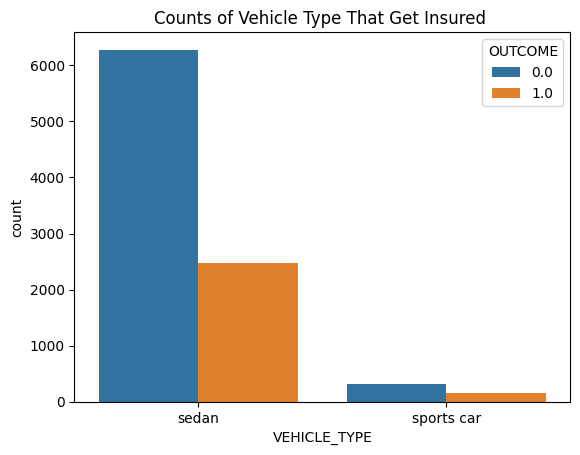

In [20]:
# ploting Vehicle_Type
ax = sbn.countplot(data = dfcar_insure, x ='VEHICLE_TYPE', hue ='OUTCOME')
ax.set_title('Counts of Vehicle Type That Get Insured ')

The graph shows that most insured cars are seden type of cars with an overwhelming over 9000 counts in the data set and sports cars below 1000 counts

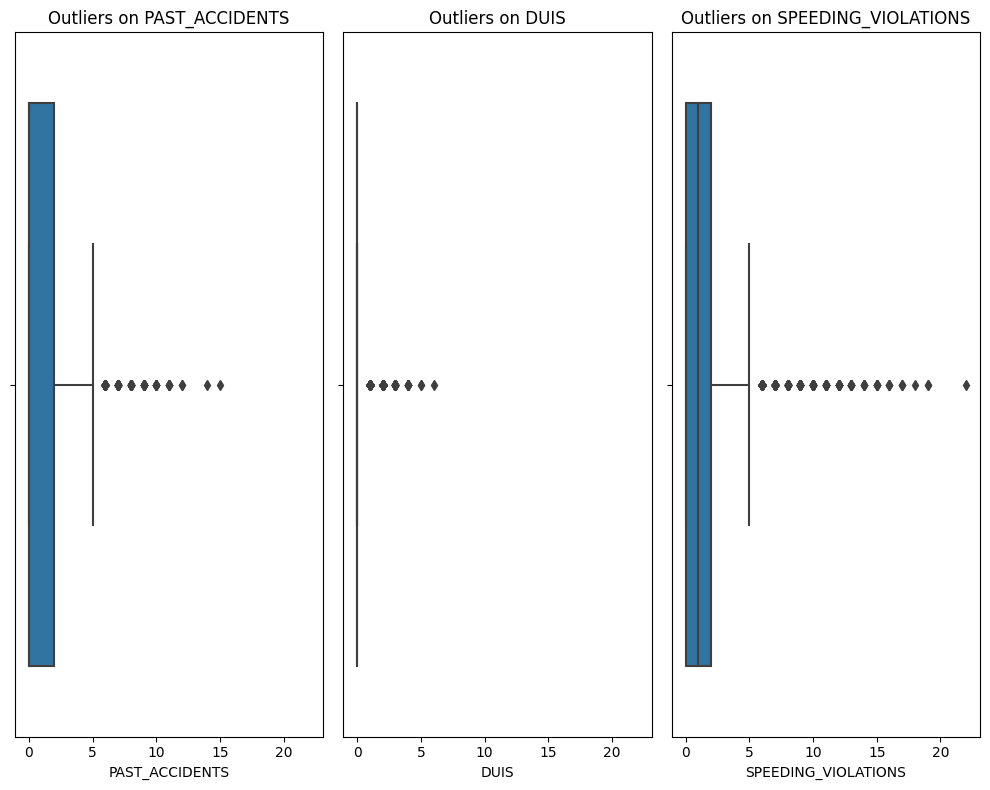

In [21]:
# checking the outliers
## making 2 side-by-side subplots


### Creating the Figure and Axes with matplotlib
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,8), sharex=True)
# Plotting Subplot 1 with Seaborn
sbn.boxplot(data=dfcar_insure, x='PAST_ACCIDENTS', ax=axes[0])
axes[0].set_title('Outliers on PAST_ACCIDENTS', fontsize = 12);
# Plotting Subplot 2 with Pandas
sbn.boxplot(data=dfcar_insure, x='DUIS', ax=axes[1])
axes[1].set_title('Outliers on DUIS', fontsize = 12);

sbn.boxplot(data=dfcar_insure, x='SPEEDING_VIOLATIONS', ax=axes[2])
axes[2].set_title('Outliers on SPEEDING_VIOLATIONS', fontsize = 12);
## Fixing overlapping labels
fig.tight_layout()


The above graph shows that the dataset has outliers on Past_Accidents , DUIS and Speeding violation.

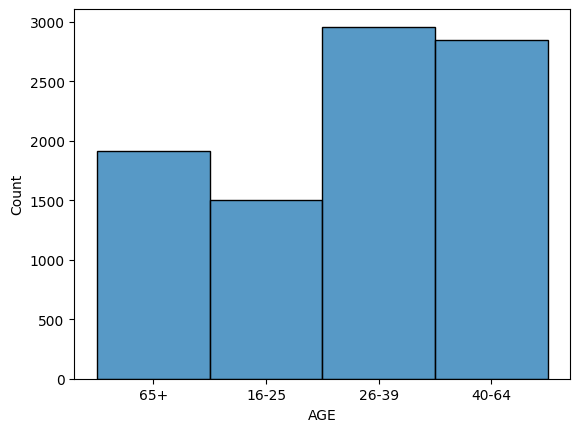

In [22]:
# target visuals
ax= sbn.histplot(data =dfcar_insure, x='AGE')

The graph shows that people between ages of 26 - 39 are more like to ensure their cars, followed closely by 40 - 64. Young people between age 16 - 25 and people who are  65 and older are not that keen to take insurance.

Text(0.5, 1.0, 'Years of Experiance And Most likely to Claim ')

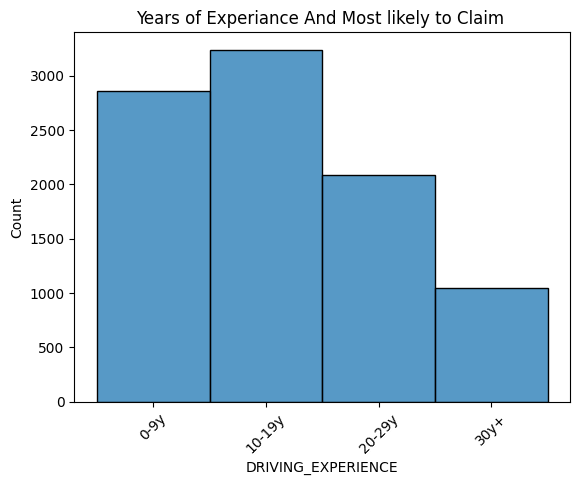

In [23]:
## Use seaborn's histplot function and save the ax
ax = sbn.histplot(data=dfcar_insure, x="DRIVING_EXPERIENCE")
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Years of Experiance And Most likely to Claim ')


Graph clearly shows that people with more yeaqrs of experiance are more likely not to ensure their cars as compare to those with least number of years.

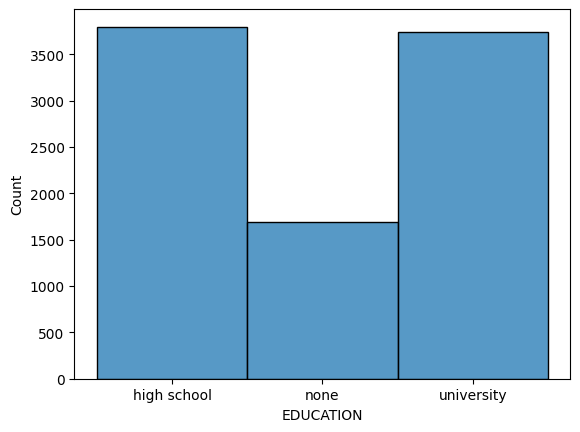

In [24]:
# education
ax = sbn.histplot(data = dfcar_insure, x='EDUCATION')


People with no education are more likely not to have  cars than those with little level of Education  

Text(0.5, 1.0, 'Count OF MARRIAD VS UNMARRIED IN Insurance dataset  ')

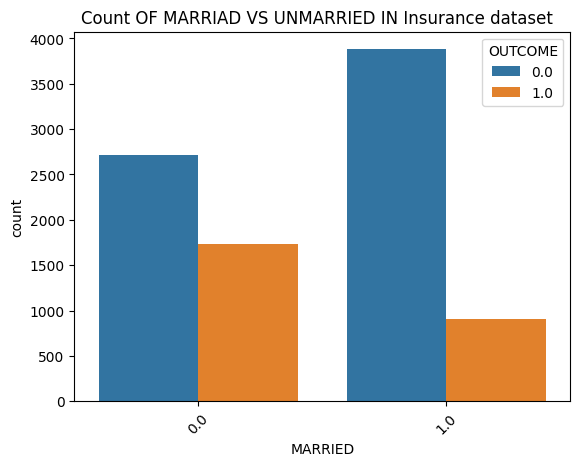

In [25]:

ax = sbn.countplot(data=dfcar_insure, x="MARRIED", hue='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Count OF MARRIAD VS UNMARRIED IN Insurance dataset  ')

Text(0.5, 1.0, 'ANNUAL_MILEAGE cars likely to InsureD ')

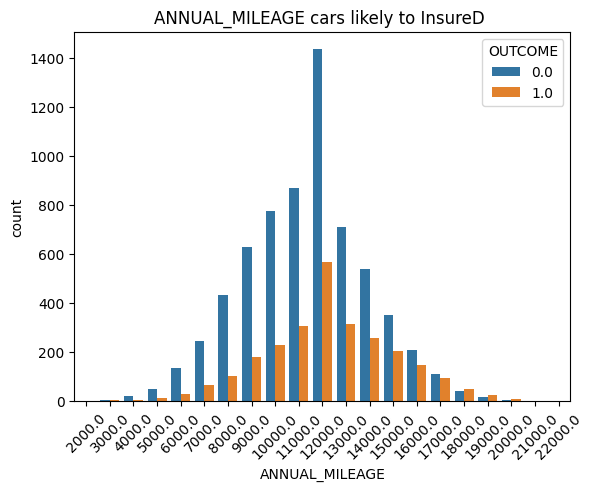

In [26]:
# countplot
ax = sbn.countplot(data=dfcar_insure, x="ANNUAL_MILEAGE", hue='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('ANNUAL_MILEAGE cars likely to InsureD ')

Cars with yearly mileage of between 11000 and 13000 are more likely to be insured

Text(0.5, 1.0, 'People in Postal Area More likely to InsureD ')

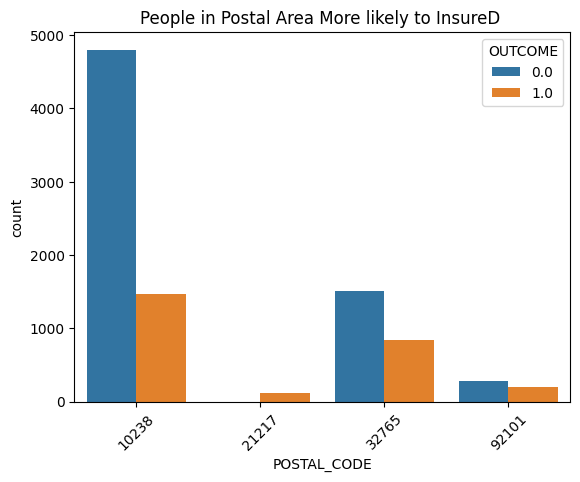

In [27]:

ax = sbn.countplot(data=dfcar_insure, x='POSTAL_CODE', hue='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('People in Postal Area More likely to InsureD ')

Areas in postal Area 10238 are more likely to insure their cars compare to people living in 21217 areas. It could mean that are is in high risk.

Text(0.5, 1.0, 'CHILDREN Number  ')

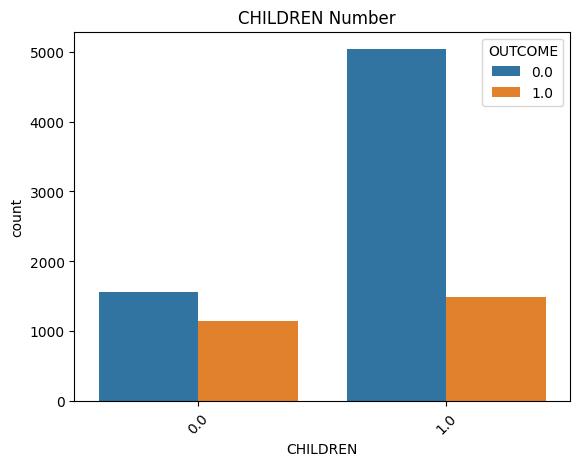

In [28]:

ax = sbn.countplot(data=dfcar_insure, x="CHILDREN", hue= 'OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('CHILDREN Number  ')

Having Children or not is not a determining factor of whether a person can take insurance or not

Text(0.5, 1.0, 'VEHICLE_YEAR cars likely To Be InsureD ')

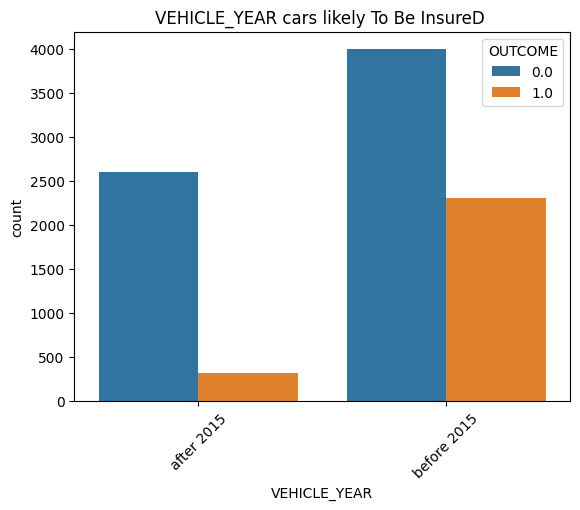

In [29]:
#VEHICLE_YEAR
ax = sbn.countplot(data=dfcar_insure, x="VEHICLE_YEAR", hue ='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('VEHICLE_YEAR cars likely To Be InsureD ')

Strangely, the numbers are showing that car that are before 2015 get higher count to be insured than the cars of of after 2015, the factors could be that cars that are after 2015 are more expensive to insure than the cars of before 2015.

Text(0.5, 1.0, 'VEHICLE_OWNERSHIP  ')

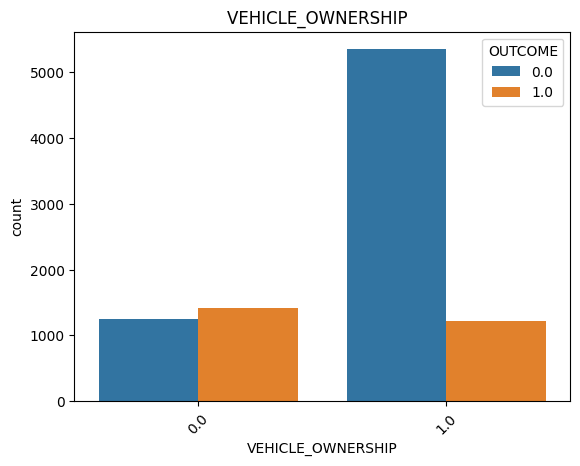

In [30]:
#OWNERSHIP
ax = sbn.countplot(data=dfcar_insure, x="VEHICLE_OWNERSHIP", hue ='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('VEHICLE_OWNERSHIP  ')

The ownership of vehicle has a driving factor in of whether to insure a car or not. The number are showing a decrease of people insuring their cars

Text(0.5, 1.0, 'Which Gender is More Likely To Insure ')

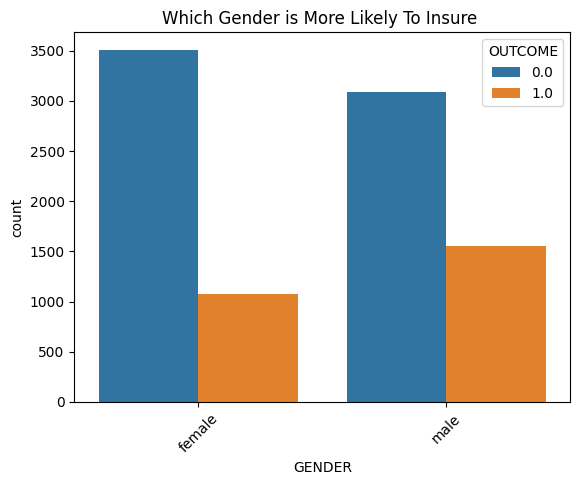

In [31]:

ax = sbn.countplot(data=dfcar_insure, x="GENDER", hue ='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Which Gender is More Likely To Insure ')

Males are showing more trend of insuring their cars than female, even though more female with 3500 are having cars than males slightly below 3200.

Text(0.5, 1.0, 'Which Race More Likely To Insure ')

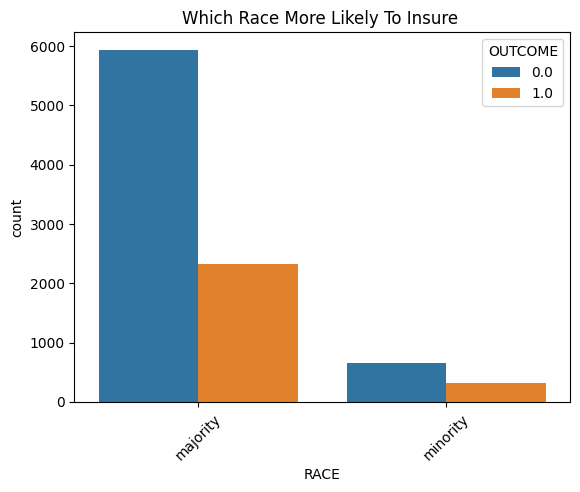

In [32]:
# RACE

ax = sbn.countplot(data=dfcar_insure, x="RACE", hue ='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Which Race More Likely To Insure ')

Majority Race is more likely to insure than minority race , this is due to the fact that more people are having cars in Majority race and propotion of insuring is also high.

Text(0.5, 1.0, 'OUTCOME ')

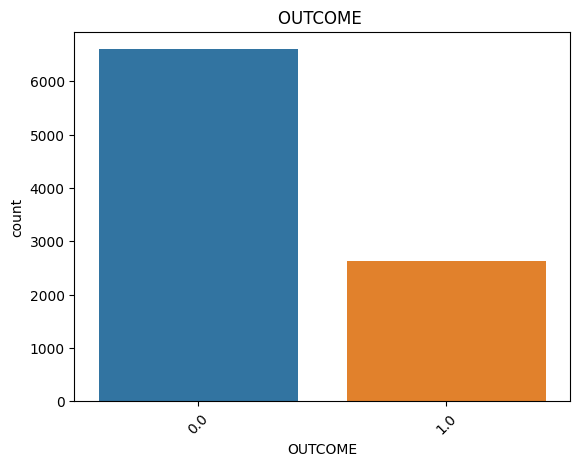

In [33]:
#OUTCOME
ax = sbn.countplot(data=dfcar_insure, x="OUTCOME",)
ax.tick_params(axis='x', rotation = 45);
ax.set_title('OUTCOME ')

For number of people having cars, more than 6000 dont have insurance and only 2500 have taken insurances. There are many factors affecting the outcome, it could be that people do not see a neeed of taking insurence when they have ownership of the car,  and again financial insecurities can play a role also.

## Project 3 Part 3

### Visualization

#### Multi- Variate Visualization

##### Correlation

In [34]:
#explore CORRELATION
corr = dfcar_insure.corr(numeric_only = True)
corr.round(2)

,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_OWNERSHIP,1.00,0.14,0.10,-0.01,-0.07,0.12,0.08,0.10,-0.35
MARRIED,0.14,1.00,0.26,0.00,-0.42,0.20,0.11,0.20,-0.22
CHILDREN,0.10,0.26,1.00,0.01,-0.41,0.21,0.10,0.19,-0.20
POSTAL_CODE,-0.01,0.00,0.01,1.00,-0.11,0.10,0.03,-0.14,0.12
ANNUAL_MILEAGE,-0.07,-0.42,-0.41,-0.11,1.00,-0.30,-0.10,-0.18,0.15
SPEEDING_VIOLATIONS,0.12,0.20,0.21,0.10,-0.30,1.00,0.35,0.43,-0.27
DUIS,0.08,0.11,0.10,0.03,-0.10,0.35,1.00,0.24,-0.18
PAST_ACCIDENTS,0.10,0.20,0.19,-0.14,-0.18,0.43,0.24,1.00,-0.29
OUTCOME,-0.35,-0.22,-0.20,0.12,0.15,-0.27,-0.18,-0.29,1.00


Text(0.5, 1.0, 'Corellation amang Features and Outcome ')

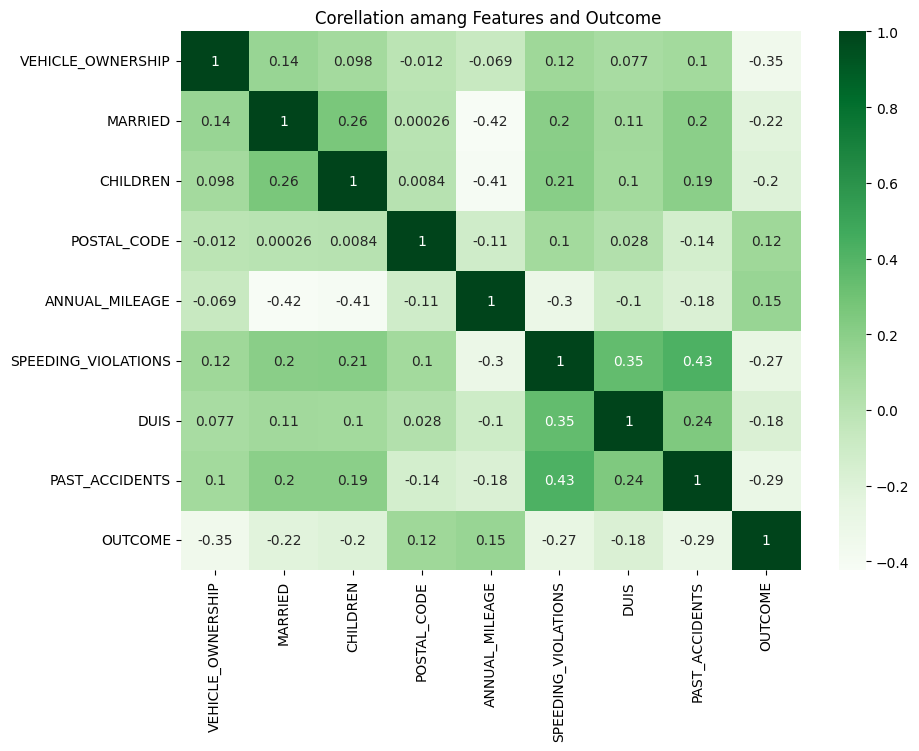

In [35]:
# Make a heatmap of correlations
fig, ax = plt.subplots(figsize=(10,7))
sbn.heatmap(corr, cmap = 'Greens',annot=True, ax = ax );
ax.set_title('Corellation amang Features and Outcome ')


The above graph shows, Postal code and Annual Mileage are moderate correlated to the target Outcome with 0.12 and 0.15 respectively. The rest of other features are least correlated to the oucome  with lowest being Vehicle_ownership of -0.35.
The highest correllation however in the above graph is Speeding Violation to Past accidents with 0.43 followed closely by Speeding Violation and Duis.

#### MultiVariate

Text(0.5, 1.0, 'Vehicle ownership in Gender')

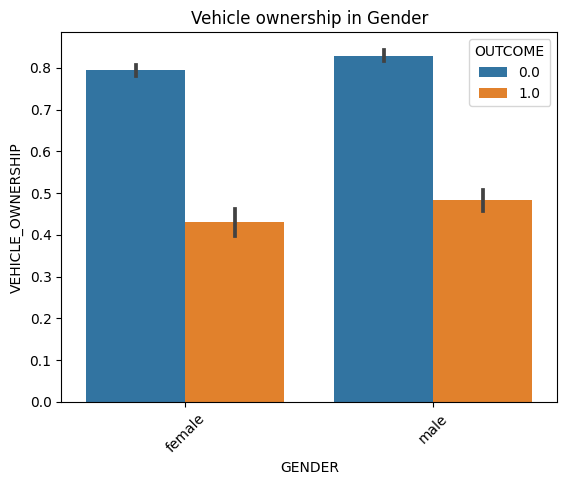

In [36]:
#
ax = sbn.barplot(data=dfcar_insure, y='VEHICLE_OWNERSHIP',x='GENDER', hue='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Vehicle ownership in Gender')

The above visualization shows that Male dominate in having vehicle ownership followed closely by females and also are more lighly to have to take insurance.

Text(0.5, 1.0, 'Speeding vs Past Accidents ')

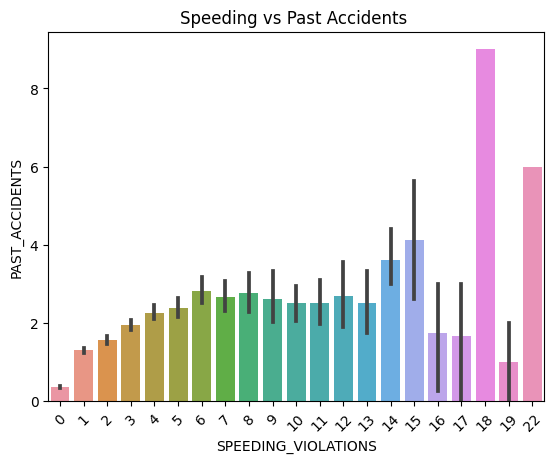

In [37]:
# Speeding vs Past Accidents
ax = sbn.barplot(data=dfcar_insure, x='SPEEDING_VIOLATIONS',y='PAST_ACCIDENTS')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Speeding vs Past Accidents ')


The graph shows positive correlation between Speed violation and accidents, high number of speed violation has more accidents.Plot above shows highest number of speed violations 18 having 9 past accidents.

Text(0.5, 1.0, 'Married and Having Children and likelyhood claiming from insurance ')

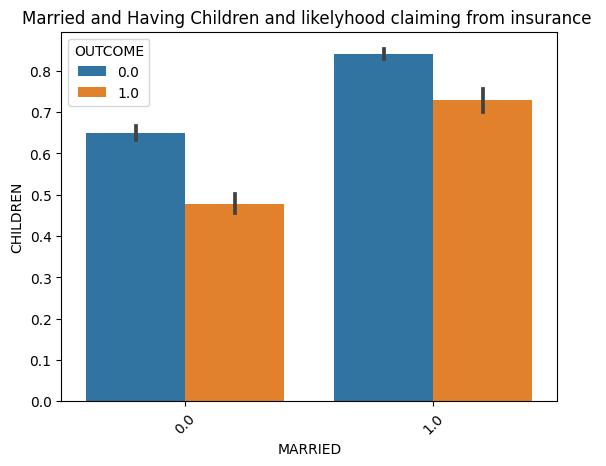

In [38]:
#
ax = sbn.barplot(data=dfcar_insure, x='MARRIED',y='CHILDREN', hue='OUTCOME')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Married and Having Children and likelyhood claiming from insurance ')

The married People and thos whao have children are more likey to take insurance than those who are not married and also not having children.

Text(0.5, 1.0, ' Who is more likely to Drive under the Influence ')

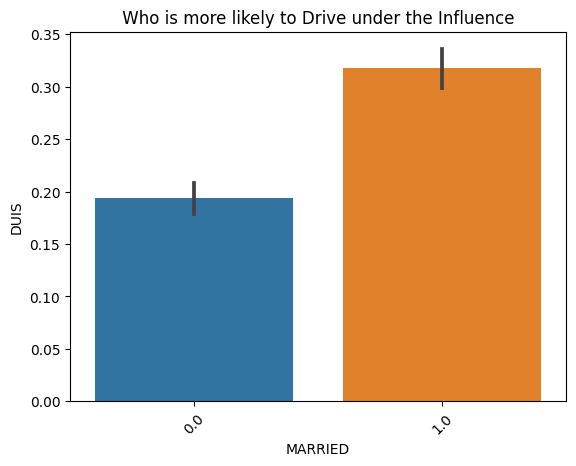

In [39]:

ax = sbn.barplot(data=dfcar_insure, x='MARRIED',y='DUIS')
ax.tick_params(axis='x', rotation = 45);
ax.set_title(' Who is more likely to Drive under the Influence ')

Plot shows that most people who are married tend to drive under the influence of Alcohol and drugs. There could be plenty of reasons why DUIS is so high on married people.

Text(0.5, 1.0, ' Who is more likely to Drive under the Influence ')

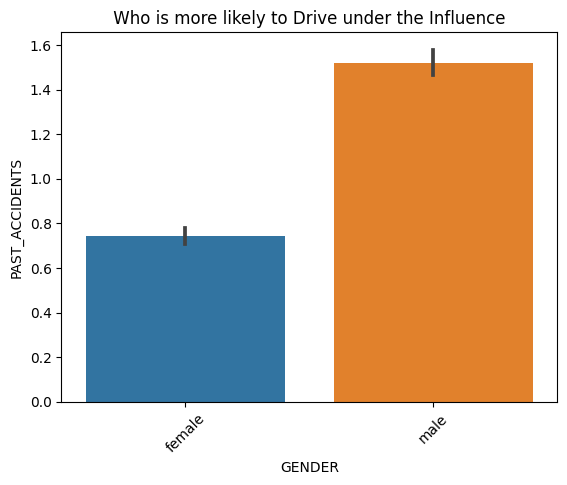

In [40]:
# Past Accidents
ax = sbn.barplot(data=dfcar_insure, x='GENDER',y='PAST_ACCIDENTS')
ax.tick_params(axis='x', rotation = 45);
ax.set_title(' Who is more likely to Drive under the Influence ')

### Analysis That demonstrate Trend

Text(0.5, 1.0, 'Speeding vs Past Accidents ')

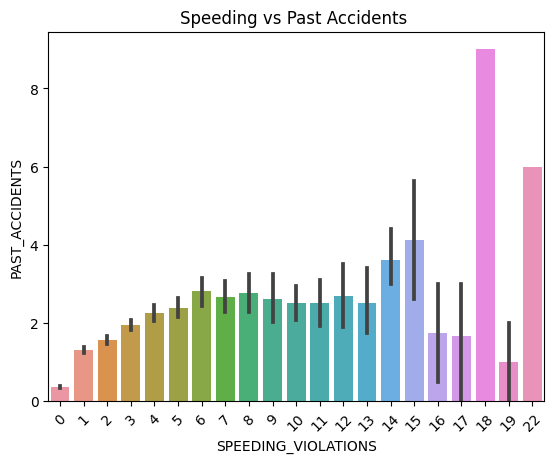

In [41]:
# Speeding vs Past Accidents
ax = sbn.barplot(data=dfcar_insure, x='SPEEDING_VIOLATIONS',y='PAST_ACCIDENTS')
ax.tick_params(axis='x', rotation = 45);
ax.set_title('Speeding vs Past Accidents ')

The above clearly shows that most accidents that are happening are caused by speeding violations.Interestingly we have 18 number of speed violation having most accidents and also again at 19 with smaller accidents, this might caused by type of the roads they are travelling in, or it could be not too many cars in that area.There are few that are showing opposite of the trends and mostly are showing positive correlation between Speeding and Past Accidents.

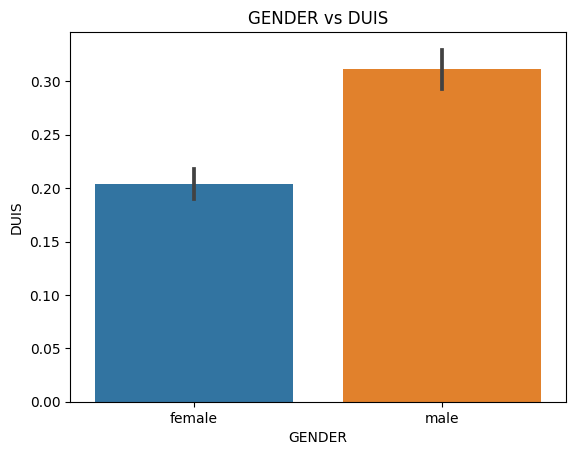

In [42]:
# Gender vs DUIS
ax=sbn.barplot(data=dfcar_insure, x='GENDER', y='DUIS')
ax.set_title('GENDER vs DUIS', fontsize = 12);


The plot above shows clearly that between male and female, males are more likely to to drive under the influence of a substance. The graph show 30 % of male compare to 20 % of female driving under the influence of a substance, and they are more likely to cause accidents, the plot below clearly inficate that.

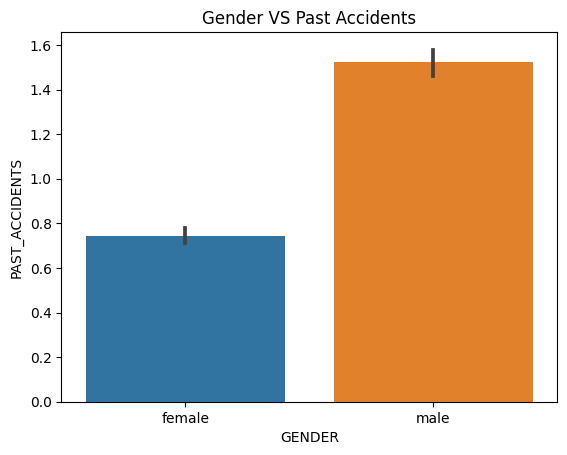

In [43]:
# Gender vs DUIS
ax= sbn.barplot(data=dfcar_insure, x='GENDER', y='PAST_ACCIDENTS')
ax.set_title('Gender VS Past Accidents');


Male are more likely to cause accidents than female due to various reasons, one of which most of males indulge in drugs as the graph clearly shows.

## Project 2 Part4

### Modeling

As part of Modeling 6 models will be trained to get better results, those models will be :
* Decission Tree Classifier
* Logistic Classifier
* Bagged Tree Classifier
* Random Forest Classifier
* K Nearest Neighbour Classifier

There will be some fine tuning of parameter using GridSearch

#### Pre-Processing

In [44]:
# exploring top 5 record
df_ML.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [45]:
# separate X features and target
y =df_ML['OUTCOME']
X =df_ML.drop(columns ='OUTCOME')


In [46]:
#  train test split
X_train, X_test, y_train, y_test  = train_test_split(X,y, random_state =42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6921 entries, 9442 to 7801
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  6921 non-null   object 
 1   GENDER               6921 non-null   object 
 2   RACE                 6921 non-null   object 
 3   DRIVING_EXPERIENCE   6921 non-null   object 
 4   EDUCATION            6921 non-null   object 
 5   INCOME               6921 non-null   object 
 6   VEHICLE_OWNERSHIP    6921 non-null   float64
 7   VEHICLE_YEAR         6921 non-null   object 
 8   MARRIED              6921 non-null   float64
 9   CHILDREN             6921 non-null   float64
 10  POSTAL_CODE          6921 non-null   int64  
 11  ANNUAL_MILEAGE       6267 non-null   float64
 12  VEHICLE_TYPE         6921 non-null   object 
 13  SPEEDING_VIOLATIONS  6921 non-null   int64  
 14  DUIS                 6921 non-null   int64  
 15  PAST_ACCIDENTS       6921 non-null 

##### Create the Preprocessor ColumnTransformer

###### Creating Numeric Tuple

In [47]:
# imputing Numeric column

# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [48]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple



('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
        'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
       dtype='object'))

###### Creating Categorical pipeline and Tuple

In [49]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe



OneHotEncoder Columns: Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [50]:
# Making a Categorical  tuple for ColumnTransformer
cat_tuple = ('Categorical', ohe_pipe, ohe_cols)
cat_tuple


('Categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
        'VEHICLE_YEAR', 'VEHICLE_TYPE'],
       dtype='object'))

###### Create and Fit the Column Transformer

In [51]:
# Create the Column Transformer# Include remainder = 'passthrough'
col_transformer = ColumnTransformer([num_tuple, cat_tuple],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)


# Fit on training data
col_transformer.fit(X_train)



ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                ('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                  verbose_feature_names_out=False)

##### Decision Tree Model

In [52]:
#instantiate a decision Tree Model
dec_tree = DecisionTreeClassifier()
# make pipeline
dec_pipe  = make_pipeline(col_transformer,dec_tree)

#fit train set into model
dec_pipe.fit(X_train, y_train )

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [53]:
# predict
X_train_tf = dec_pipe.predict(X_train)
X_test_tf = dec_pipe.predict(X_test)

In [54]:
# evaluate
print(f'Train:{classification_report(y_train, X_train_tf)},  Test: {classification_report(y_test, X_test_tf)}')

Train:              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4969
         1.0       1.00      0.94      0.97      1952

    accuracy                           0.98      6921
   macro avg       0.99      0.97      0.98      6921
weighted avg       0.98      0.98      0.98      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.83      0.82      0.82      1630
         1.0       0.57      0.59      0.58       678

    accuracy                           0.75      2308
   macro avg       0.70      0.70      0.70      2308
weighted avg       0.75      0.75      0.75      2308



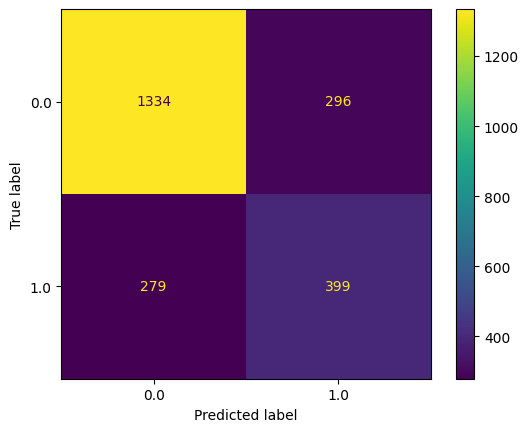

In [55]:
#
ConfusionMatrixDisplay.from_predictions(y_test, X_test_tf);

Decision Tree model predicted 76 percent accuracy, with 1351 client predicted that they won't claim from insurance and 395 that will claim and some errors of 279 predicted to claim and the don't and 283 that were predicted to not going to claim but they actually did

######Decision Tree with GridSearch

In [56]:
# Looking at options for tuning this model
dec_pipe.get_params()



{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
          'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(

In [57]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'decisiontreeclassifier__min_samples_split': [2, 3, 4],
              'decisiontreeclassifier__max_features':[5,6,7,8,9]}

# Instantiate GridSearchCV
decgrid_search = GridSearchCV(dec_pipe, param_grid, verbose = 1)
# Fit the Gridsearch on the training data
decgrid_search.fit(X_train, y_train)



Fitting 5 folds for each of 1650 candidates, totalling 8250 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCI...
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10,
                                                               None],
                         'decisiontreeclassifier__max_features': [5, 6, 7, 8,
                                                                  9],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3,
                                                                      4, 5, 6,
                                                                      7, 8, 9,
                                                                      10],
                         'decisiontreeclassifier__min_samples_split': [2, 3,
                                                                       4]},
             verbose=1)

In [58]:
# Obtain the best combination directly
print(decgrid_search.best_params_)

# Now define the best version of the model
#Decbest_model = decgrid_search.best_params


{'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__max_features': 9, 'decisiontreeclassifier__min_samples_leaf': 8, 'decisiontreeclassifier__min_samples_split': 2}


In [59]:
# instantiating best Model
best_params ={'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__max_features': 9, 'decisiontreeclassifier__min_samples_leaf': 8, 'decisiontreeclassifier__min_samples_split': 4}
bestdecgrid_search = GridSearchCV(dec_pipe, best_params, verbose = 1)
# pregict and evaluate
X_trainbestDec =decgrid_search.predict(X_train)
X_testbestDec = decgrid_search.predict(X_test)

#evaluate
# evaluate
print(f'Train:{classification_report(y_train, X_trainbestDec)},  Test: {classification_report(y_test, X_testbestDec)}')

Train:              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      4969
         1.0       0.77      0.62      0.69      1952

    accuracy                           0.84      6921
   macro avg       0.81      0.77      0.79      6921
weighted avg       0.83      0.84      0.83      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      1630
         1.0       0.76      0.60      0.67       678

    accuracy                           0.83      2308
   macro avg       0.80      0.76      0.77      2308
weighted avg       0.82      0.83      0.82      2308



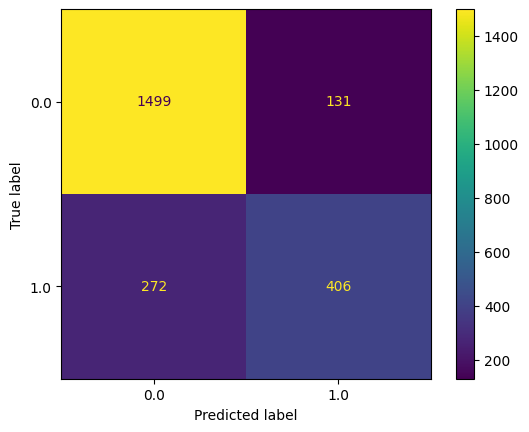

In [60]:
#
ConfusionMatrixDisplay.from_predictions(y_test, X_testbestDec);

Decision Tree that has been hypertuned  model predicted 81 percent accuracy that is much better, with 1470 client predicted that they won't claim from insurance and 409 that will claim and some errors of 160 predicted to claim and the don't and 269 that were predicted to not going to claim but they actually did.

###### Decision Tree with PCA

In [61]:
# Instantiating PCA
# Create a transformer pipeline
tranformer = make_pipeline(col_transformer, PCA(n_components=.90))



In [62]:
# instantiating model
decpca = DecisionTreeClassifier()

# make a pipeline
decpca_pipe = make_pipeline(tranformer,decpca )

#fit train set
decpca_pipe.fit(X_train, y_train)

#predict
X_traintDecwithP_tf = decpca_pipe.predict(X_train)
X_testtDecwithP_tf =decpca_pipe.predict(X_test)

In [63]:
# evaluation report
print(f'Train:{classification_report(y_train, X_traintDecwithP_tf)},  Test: {classification_report(y_test, X_testtDecwithP_tf)}')

Train:              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      4969
         1.0       1.00      0.94      0.97      1952

    accuracy                           0.98      6921
   macro avg       0.99      0.97      0.98      6921
weighted avg       0.98      0.98      0.98      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      1630
         1.0       0.53      0.52      0.53       678

    accuracy                           0.73      2308
   macro avg       0.67      0.67      0.67      2308
weighted avg       0.72      0.73      0.72      2308



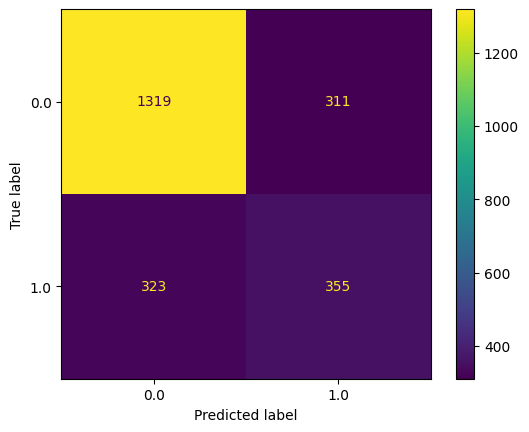

In [64]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testtDecwithP_tf);

Decision Tree with PDC  model predicted 74 percent accuracy it went down, with 1330 client predicted that they won't claim from insurance and 368 that will claim and some errors of 300 predicted to claim and the don't and 310 that were predicted to not going to claim but they actually did.

##### Logistic Regression

In [65]:
# Instantiate the model
log_rec = LogisticRegression()

#make a model pipeline
log_pipe  = make_pipeline(col_transformer, log_rec)
# fit trai set to model pipeline
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression())])

In [66]:
# predict
X_trainlog_tf = log_pipe.predict(X_train)
X_testlog_xtf =log_pipe.predict(X_test)

In [67]:
# evaluate
print(f'Train:{classification_report(y_train, X_trainlog_tf)},  Test: {classification_report(y_test, X_testlog_xtf)}')

Train:              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4969
         1.0       0.75      0.67      0.71      1952

    accuracy                           0.84      6921
   macro avg       0.81      0.79      0.80      6921
weighted avg       0.84      0.84      0.84      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1630
         1.0       0.76      0.64      0.69       678

    accuracy                           0.83      2308
   macro avg       0.81      0.78      0.79      2308
weighted avg       0.83      0.83      0.83      2308



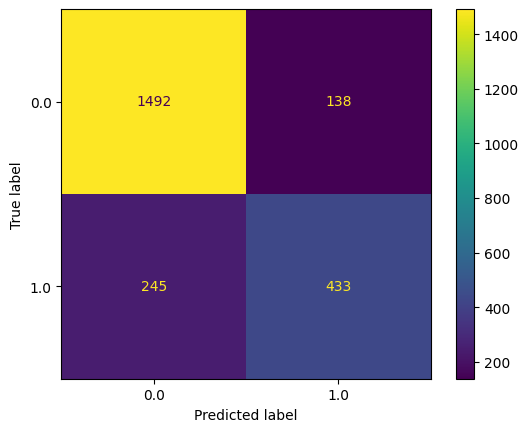

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testlog_xtf);

Logistic Regression model performed much better with predictions of  83 percent accuracy that is much better, with 1492 client predicted that they won't claim from insurance and 433 that will claim and some errors of 138 predicted to claim and the don't and 245 that were predicted to not going to claim but they actually did.

###### Logistic with GridSearch

In [69]:
# Looking at options for tuning this model


In [70]:
log_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
          'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(

In [71]:
# Define dictionary of parameters to tune and the values to try
logparam_grid = {'logisticregression__C': [0.1,1.0,10.0],
              'logisticregression__n_jobs': [1,2,3,4,5,None],
              'logisticregression__penalty': ['l2'],
              'logisticregression__verbose':[0,1]}


# Instantiate GridSearchCV
loggrid_search = GridSearchCV(log_pipe, logparam_grid)
# Fit the Gridsearch on the training data
loggrid_search.fit(X_train, y_train)



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Usi

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCI...
                                                                         Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.1, 1.0, 10.0],
                         'logisticregression__n_jobs': [1, 2, 3, 4, 5, None],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__verbose': [0, 1]})

In [72]:

print(loggrid_search.best_params_)

{'logisticregression__C': 0.1, 'logisticregression__n_jobs': 1, 'logisticregression__penalty': 'l2', 'logisticregression__verbose': 0}


In [73]:
log_bestparam ={'logisticregression__C': [0.1], 'logisticregression__n_jobs':[1], 'logisticregression__penalty': ['l2'], 'logisticregression__verbose':[0]}
bestloggrid_search = GridSearchCV(log_pipe, log_bestparam)

bestloggrid_search.fit(X_train, y_train)
# pregict and evaluate

X_trainbestlog =bestloggrid_search.predict(X_train)
X_testbestlog = bestloggrid_search.predict(X_test)

#evaluate
# evaluate
print(f'Train:{classification_report(y_train, X_trainbestlog)},  Test: {classification_report(y_test, X_testbestlog)}')

Train:              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      4969
         1.0       0.75      0.66      0.70      1952

    accuracy                           0.84      6921
   macro avg       0.81      0.79      0.80      6921
weighted avg       0.84      0.84      0.84      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1630
         1.0       0.76      0.63      0.69       678

    accuracy                           0.83      2308
   macro avg       0.81      0.77      0.79      2308
weighted avg       0.83      0.83      0.83      2308



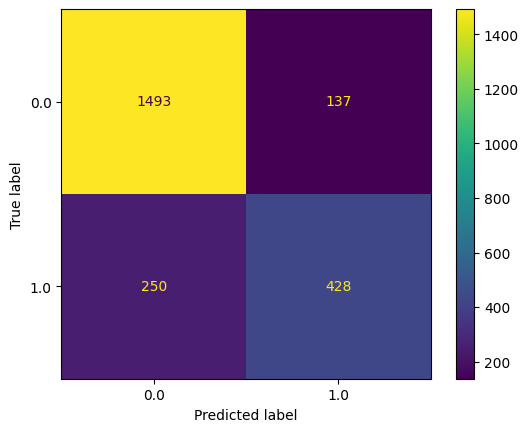

In [74]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testbestlog);

Logistic Regression that has been hypertuned model performed much better as well with predictions of  83 percent accuracy that is much better, with 1493 client predicted that they won't claim from insurance and 428 that will claim and some errors of 137 predicted to claim and the don't and 250 that were predicted to not going to claim but they actually did.

###### Logistic Regression with PCA

In [75]:
# instantiating model
logpca = LogisticRegression()

# make a pipeline
logpca_pipe = make_pipeline(tranformer,logpca )

#fit train set
logpca_pipe.fit(X_train, y_train)

#predict
X_traintlogwithP_tf = logpca_pipe.predict(X_train)
X_testtlogwithP_tf =logpca_pipe.predict(X_test)

In [76]:
# evaluation report
print(f'Train:{classification_report(y_train, X_traintlogwithP_tf)},  Test: {classification_report(y_test, X_testtlogwithP_tf)}')

Train:              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      4969
         1.0       0.74      0.63      0.68      1952

    accuracy                           0.83      6921
   macro avg       0.80      0.77      0.79      6921
weighted avg       0.83      0.83      0.83      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1630
         1.0       0.74      0.63      0.68       678

    accuracy                           0.82      2308
   macro avg       0.80      0.77      0.78      2308
weighted avg       0.82      0.82      0.82      2308



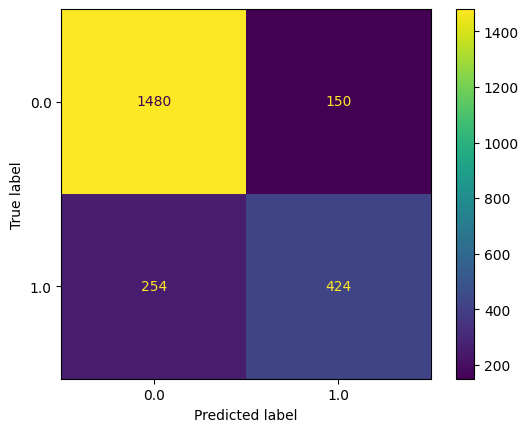

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testtlogwithP_tf);

Logistic Regression with PCA model performed  good with predictions of  82 percent accuracy that is much better, with 1480 client predicted that they won't claim from insurance and 424 that will claim and some errors of 150 predicted to claim and the don't and 254 that were predicted to not going to claim but they actually did.

##### Bagging Tree

In [78]:
#instantiating bagging Tree Model
bag = BaggingClassifier()

# make model pipeline
bag_pipe  = make_pipeline(col_transformer,bag )

# fit the train set to pipe_line
bag_pipe.fit(X_train, y_train)

# predict
X_trainbag_tf  = bag_pipe.predict(X_train)
X_testbag_tf  = bag_pipe.predict(X_test)
# evaluate
print(f'Train:{classification_report(y_train, X_trainbag_tf)},  Test: {classification_report(y_test, X_testbag_tf)}')


Train:              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      4969
         1.0       0.96      0.93      0.95      1952

    accuracy                           0.97      6921
   macro avg       0.97      0.96      0.96      6921
weighted avg       0.97      0.97      0.97      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1630
         1.0       0.66      0.58      0.61       678

    accuracy                           0.79      2308
   macro avg       0.75      0.73      0.73      2308
weighted avg       0.78      0.79      0.78      2308



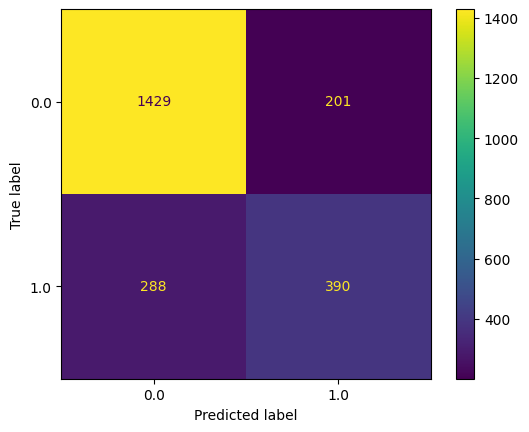

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testbag_tf);

Bagging Tree model performed good with predictions of  80 percent accuracy that is much better, with 1432 client predicted that they won't claim from insurance and 403 that will claim and some errors of 193 predicted to claim and the don't and 275 that were predicted to not going to claim but they actually did.

###### Bagged Tree with SearchGrid

In [80]:
# Get params
bag_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
          'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(

In [81]:
baggrid_params  ={'baggingclassifier__n_estimators': [1,3,5,10],
 'baggingclassifier__n_jobs':[1,2,3,4, None] ,
 'baggingclassifier__oob_score': [True,False],
 'baggingclassifier__random_state':[20,30,42,None],
 'baggingclassifier__verbose': [0,1]
}

In [82]:
# Instantiate GridSearchCV
baggrid_search = GridSearchCV(bag_pipe, baggrid_params)
# Fit the Gridsearch on the training data
baggrid_search.fit(X_train, y_train)

# Obtain the best combination directly





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few e

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCI...
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('baggingclassifier',
                                        BaggingClassifier())]),
             param_grid={'baggingclassifier__n_estimators': [1, 3, 5, 10],
                         'baggingclassifier__n_jobs': [1, 2, 3, 4, None],
                         'baggingclassifier__oob_score': [True, False],
                         'baggingclassifier__random_state': [20, 30, 42, None],
                         'baggingclassifier__verbose': [0, 1]})

In [83]:
# Now define the best version of the model
print(baggrid_search.best_params_)

{'baggingclassifier__n_estimators': 10, 'baggingclassifier__n_jobs': 1, 'baggingclassifier__oob_score': True, 'baggingclassifier__random_state': 30, 'baggingclassifier__verbose': 0}


In [84]:
 # best parameter
bagbest_params ={'baggingclassifier__n_estimators': [10], 'baggingclassifier__n_jobs':[1], 'baggingclassifier__oob_score': [True], 'baggingclassifier__random_state': [30], 'baggingclassifier__verbose': [0]}

baggrid_search = GridSearchCV(bag_pipe, bagbest_params)
baggrid_search.fit(X_train, y_train)

X_trainbaggrid_search_tf =baggrid_search.predict(X_train)
X_testbaggrid_search_tf =baggrid_search.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few e

In [85]:
# evaluate
print(f'Train:{classification_report(y_train, X_trainbaggrid_search_tf)},  Test: {classification_report(y_test, X_testbaggrid_search_tf)}')


Train:              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      4969
         1.0       0.96      0.93      0.94      1952

    accuracy                           0.97      6921
   macro avg       0.96      0.96      0.96      6921
weighted avg       0.97      0.97      0.97      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1630
         1.0       0.67      0.58      0.62       678

    accuracy                           0.79      2308
   macro avg       0.75      0.73      0.74      2308
weighted avg       0.79      0.79      0.79      2308



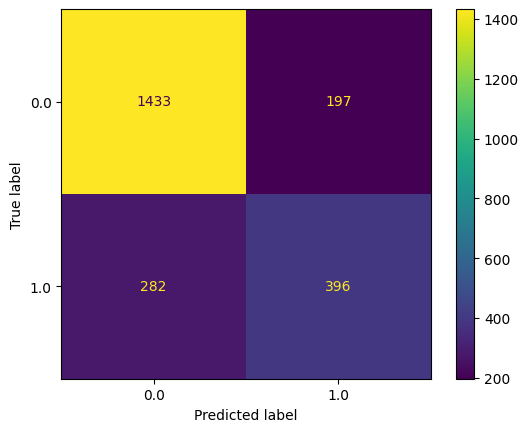

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testbaggrid_search_tf);

Bagging Tree model that has been hypertuned performed good with predictions of  79 percent accuracy that is , with 1433 client predicted that they won't claim from insurance and 396 that will claim and some errors of 197 predicted to claim and the don't and 282 that were predicted to not going to claim but they actually did.

###### Bagged Tree with PCA


In [87]:
# instantiating model
bagpca = BaggingClassifier()

# make a pipeline
bagpca_pipe = make_pipeline(tranformer,bagpca )

#fit train set
bagpca_pipe.fit(X_train, y_train)

#predict
X_traintbagwithP_tf = bagpca_pipe.predict(X_train)
X_testtbagwithP_tf =bagpca_pipe.predict(X_test)

In [88]:
# evaluation report
print(f'Train:{classification_report(y_train, X_traintbagwithP_tf)},  Test: {classification_report(y_test, X_testtbagwithP_tf)}')

Train:              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      4969
         1.0       0.96      0.93      0.95      1952

    accuracy                           0.97      6921
   macro avg       0.97      0.96      0.96      6921
weighted avg       0.97      0.97      0.97      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      1630
         1.0       0.66      0.52      0.58       678

    accuracy                           0.78      2308
   macro avg       0.74      0.70      0.72      2308
weighted avg       0.77      0.78      0.77      2308



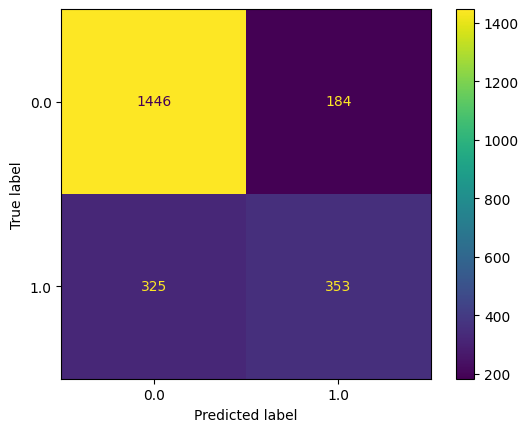

In [89]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testtbagwithP_tf);

Bagging Tree model with PCA performed good with predictions of  78 percent accuracy that is much better, with 1433 client predicted that they won't claim from insurance and 365 that will claim and some errors of 197 predicted to claim and the don't and 313 that were predicted to not going to claim but they actually did.

##### KNearestNeighbour

In [90]:
# instantiatint KNN Model
knn = KNeighborsClassifier()
# make a pipeline
knn_pipe = make_pipeline(col_transformer, knn)
# fit the pipeline
knn_pipe.fit(X_train, y_train)

# predict
knnX_train_tf  = knn_pipe.predict(X_train)
knnX_test_tf  = knn_pipe.predict(X_test)

# evaluate
print(f'Train:{classification_report(y_train, knnX_train_tf)},  Test: {classification_report(y_test, knnX_test_tf)}')


Train:              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      4969
         1.0       0.78      0.74      0.76      1952

    accuracy                           0.87      6921
   macro avg       0.84      0.83      0.84      6921
weighted avg       0.87      0.87      0.87      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1630
         1.0       0.67      0.61      0.64       678

    accuracy                           0.80      2308
   macro avg       0.76      0.74      0.75      2308
weighted avg       0.79      0.80      0.80      2308



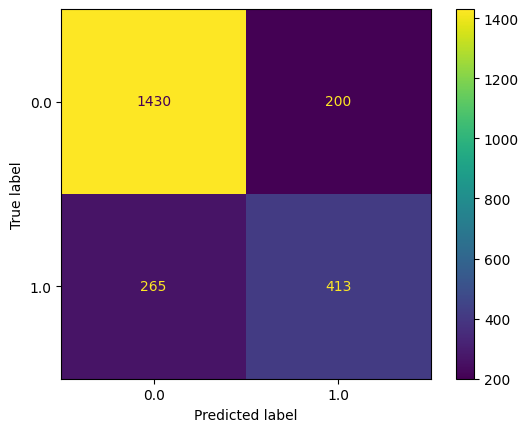

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test, knnX_test_tf);

KNearestNeighbour model performed good with predictions of  80 percent accuracy that is much better, with 1430 client predicted that they won't claim from insurance and 413 that will claim and some errors of 200 predicted to claim and the don't and 265 that were predicted to not going to claim but they actually did.

###### KNN with GridSearch

In [92]:

knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
          'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
         dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(

In [93]:
# Hypertuning parameters
knn_param  = {'kneighborsclassifier__metric_params': [None],
 'kneighborsclassifier__n_jobs': [1,2,3,4,None],
 'kneighborsclassifier__n_neighbors': [5,6,7],
 'kneighborsclassifier__p': [2,3,]}

In [94]:
# Instantiate GridSearchCV
knngrid_search = GridSearchCV(knn_pipe, knn_param)
# Fit the Gridsearch on the training data
knngrid_search.fit(X_train, y_train)

# Obtain the best combination directly

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCI...
                                                                         Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric_params': [None],
                         'kneighborsclassifier__n_jobs': [1, 2, 3, 4, None],
                         'kneighborsclassifier__n_neighbors': [5, 6, 7],
                         'kneighborsclassifier__p': [2, 3]})

In [95]:
knngrid_search.best_params_

{'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': 1,
 'kneighborsclassifier__n_neighbors': 7,
 'kneighborsclassifier__p': 2}

In [96]:
 # best parameter
knnbest_params ={'kneighborsclassifier__metric_params': [None], 'kneighborsclassifier__n_jobs':[1], 'kneighborsclassifier__n_neighbors': [7], 'kneighborsclassifier__p': [2]}

knnbestgrid_search = GridSearchCV(knn_pipe, knnbest_params)
knnbestgrid_search.fit(X_train, y_train)

X_trainknngrid_search_tf =knnbestgrid_search.predict(X_train)
X_testknngrid_search_tf =knnbestgrid_search.predict(X_test)

In [97]:
# evaluate
print(f'Train:{classification_report(y_train, X_trainknngrid_search_tf)},  Test: {classification_report(y_test, X_testknngrid_search_tf)}')

Train:              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4969
         1.0       0.76      0.72      0.74      1952

    accuracy                           0.86      6921
   macro avg       0.83      0.82      0.82      6921
weighted avg       0.86      0.86      0.86      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1630
         1.0       0.69      0.62      0.65       678

    accuracy                           0.81      2308
   macro avg       0.77      0.75      0.76      2308
weighted avg       0.80      0.81      0.80      2308



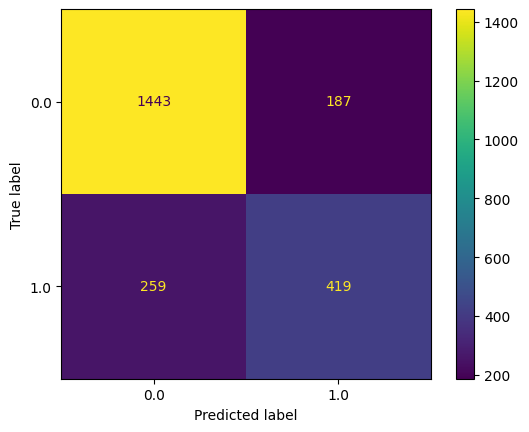

In [98]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testknngrid_search_tf);

KNEarestNeighbour  model that has been hypertuned performed good with predictions of  81 percent accuracy that is much better, with 1443 client predicted that they won't claim from insurance and 419 that will claim and some errors of 187 predicted to claim and the don't and 259 that were predicted to not going to claim but they actually did.

###### KNN WITH PCA

In [99]:
# instantiating model
KNNpca = KNeighborsClassifier()

# make a pipeline
KNNpca_pipe = make_pipeline(tranformer,KNNpca )

#fit train set
KNNpca_pipe.fit(X_train, y_train)

#predict
X_traintKNNwithP_tf = KNNpca_pipe.predict(X_train)
X_testtKNNwithP_tf =KNNpca_pipe.predict(X_test)

In [100]:
# evaluation report
print(f'Train:{classification_report(y_train, X_traintKNNwithP_tf)},  Test: {classification_report(y_test, X_testtKNNwithP_tf)}')

Train:              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      4969
         1.0       0.78      0.73      0.76      1952

    accuracy                           0.87      6921
   macro avg       0.84      0.83      0.83      6921
weighted avg       0.86      0.87      0.86      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1630
         1.0       0.68      0.60      0.64       678

    accuracy                           0.80      2308
   macro avg       0.76      0.74      0.75      2308
weighted avg       0.79      0.80      0.80      2308



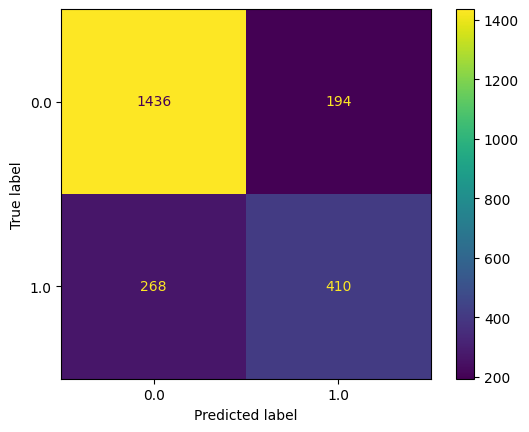

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testtKNNwithP_tf);

KNN model with PCA performed good with predictions of  80 percent accuracy that is much better, with 1436 client predicted that they won't claim from insurance and 410 that will claim and some errors of 194 predicted to claim and the don't and 268 that were predicted to not going to claim but they actually did.

##### RandomForest Model

In [102]:
#instantiating bagging Tree Model
Ran = RandomForestClassifier()

# make model pipeline
Ran_pipe  = make_pipeline(col_transformer,Ran )

# fit the train set to pipe_line
Ran_pipe.fit(X_train, y_train)

# predict
X_trainRan_tf  = Ran_pipe.predict(X_train)
X_testRan_tf  = Ran_pipe.predict(X_test)
# evaluate
print(f'Train:{classification_report(y_train, X_trainRan_tf)},  Test: {classification_report(y_test, X_testRan_tf)}')


Train:              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4969
         1.0       0.97      0.97      0.97      1952

    accuracy                           0.98      6921
   macro avg       0.98      0.98      0.98      6921
weighted avg       0.98      0.98      0.98      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1630
         1.0       0.67      0.58      0.62       678

    accuracy                           0.79      2308
   macro avg       0.75      0.73      0.74      2308
weighted avg       0.79      0.79      0.79      2308



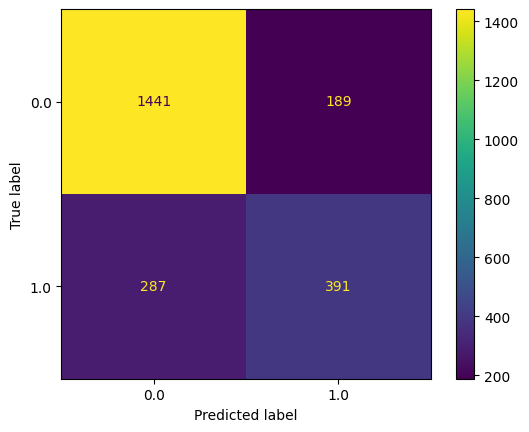

In [103]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testRan_tf);

###### Random Forest With PCA

In [104]:
# instantiating model
RFpca = RandomForestClassifier()

# make a pipeline
RFpca_pipe = make_pipeline(tranformer,RFpca )

#fit train set
RFpca_pipe.fit(X_train, y_train)

#predict
X_traintRFwithP_tf = RFpca_pipe.predict(X_train)
X_testtRFwithP_tf =RFpca_pipe.predict(X_test)

In [105]:
# evaluation report
print(f'Train:{classification_report(y_train, X_traintRFwithP_tf)},  Test: {classification_report(y_test, X_testtRFwithP_tf)}')

Train:              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4969
         1.0       0.96      0.98      0.97      1952

    accuracy                           0.98      6921
   macro avg       0.98      0.98      0.98      6921
weighted avg       0.98      0.98      0.98      6921
,  Test:               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1630
         1.0       0.69      0.56      0.62       678

    accuracy                           0.80      2308
   macro avg       0.76      0.73      0.74      2308
weighted avg       0.79      0.80      0.79      2308



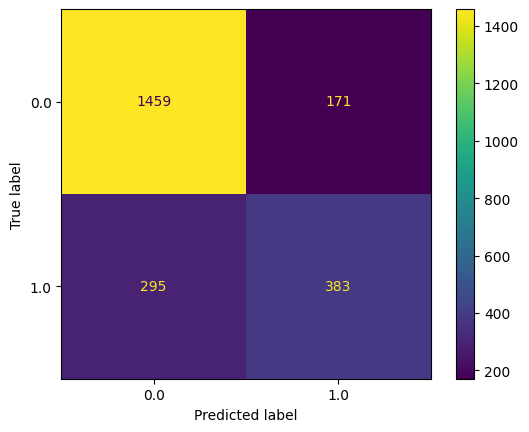

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test, X_testtRFwithP_tf);

## Recomandation

Out of 5 tried models , the best model that I recommend for production in this case is Logistic Regression with little hypertuning of parameters. Even normal Logistic Regression performed vey well among all with accuracy of 83% on both normal and hypertuning with only 137 clients that were falsely predicted to claim the insurance and again and 250 clients that were false predicted to not going to claim when they actually claim but again it is the best model among many that were trained. Both FP and FN are low compare to other models.

## Project 2 Part 5

Part 5 of this project is presentation that has brief summary about following points:
  * Stakeholder
  * What was the goal of the predictions
  * brief discussion about the data
  * Visual Presentation of Findings
  * Strength and limitation of the model
  * final Recomendation to Stakeholders.